In [1]:
import math,os,glob,h5py
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

prediction_WeiAdmStd_OR.h5
(3000000, 26)
(2000000, 26)


/usr/local/bin/start_ipykernel.py:61: RuntimeWarning: divide by zero encountered in power
/usr/local/bin/start_ipykernel.py:62: RuntimeWarning: divide by zero encountered in power
/usr/local/bin/start_ipykernel.py:63: RuntimeWarning: divide by zero encountered in power
/usr/local/bin/start_ipykernel.py:64: RuntimeWarning: divide by zero encountered in power
/usr/local/bin/start_ipykernel.py:65: RuntimeWarning: divide by zero encountered in power


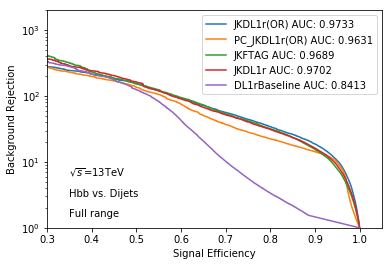

In [16]:
filepath="prediction_WeiAdmStd_OR.h5"
print filepath
load_file=h5py.File(filepath,'r')

predict=load_file.get("predict")
print predict.shape
predict=np.reshape(predict,(predict.shape[0],predict.shape[1]))
#predict=predict[(predict[:,10]<=138.) & (predict[:,10]>=84.)] #loose
#predict=predict[(predict[:,11]<=500.) & (predict[:,11]>=250.)]
#predict=predict[(predict[:,11]<=1000.) & (predict[:,11]>=500.)]
#predict=predict[predict[:,11]>=1000.]
predict=predict[predict[:,2]==0]
#predict=predict[predict[:,0]==0]
y=predict[:,1]
print predict.shape

JKDL1rScoreHiggs=predict[:,15]
JKDL1rScoreQCD=predict[:,14]
#JKDL1rScoreQCD=predict[:,16]
JKDL1r=np.true_divide(JKDL1rScoreHiggs,JKDL1rScoreQCD)
JKDL1r=np.nan_to_num(JKDL1r)

PC_JKDL1rScoreHiggs=predict[:,18]
PC_JKDL1rScoreQCD=predict[:,17]
#PC_JKDL1rScoreQCD=predict[:,19]
PC_JKDL1r=np.true_divide(PC_JKDL1rScoreHiggs,PC_JKDL1rScoreQCD)
PC_JKDL1r=np.nan_to_num(PC_JKDL1r)

#JKFTAG
EFTAGScoreHiggs=predict[:,21]
EFTAGScoreQCD=predict[:,20]
#EFTAGScoreQCD=predict[:,22]
EFTAG=np.true_divide(EFTAGScoreHiggs,EFTAGScoreQCD)
EFTAG=np.nan_to_num(EFTAG)
#JKDL1r
EDL1rScoreHiggs=predict[:,24]
EDL1rScoreQCD=predict[:,23]
#EDL1rScoreQCD=predict[:,25]
EDL1r=np.true_divide(EDL1rScoreHiggs,EDL1rScoreQCD)
EDL1r=np.nan_to_num(EDL1r)

DL1rBaseline=predict[:,13]
w=predict[:,3]
#w=np.full((y.shape[0], ), 1)

JKDL1r_bkg,JKDL1r_signal,JKDL1r_thres=roc_curve(y,JKDL1r,sample_weight=w)
PC_JKDL1r_bkg,PC_JKDL1r_signal,PC_JKDL1r_thres=roc_curve(y,PC_JKDL1r,sample_weight=w)
DL1rBaseline_bkg,DL1rBaseline_signal,DL1rBaseline_thres=roc_curve(y,DL1rBaseline,sample_weight=w)

AUC_JKDL1r=roc_auc_score(y, JKDL1r,sample_weight=w)
AUC_PC_JKDL1r=roc_auc_score(y, PC_JKDL1r,sample_weight=w)
AUC_DL1rBaseline=roc_auc_score(y, DL1rBaseline,sample_weight=w)

EFTAG_bkg,EFTAG_signal,EFTAG_thres=roc_curve(y,EFTAG,sample_weight=w)
AUC_EFTAG=roc_auc_score(y, EFTAG,sample_weight=w)
EDL1r_bkg,EDL1r_signal,EDL1r_thres=roc_curve(y,EDL1r,sample_weight=w)
AUC_EDL1r=roc_auc_score(y, EDL1r,sample_weight=w)

effcut=0.00016
plt.figure(1)
plt.plot(JKDL1r_signal-effcut,np.power(JKDL1r_bkg,-1.0),label="JKDL1r(OR) "+"AUC: "+str(AUC_JKDL1r)[0:6])
plt.plot(PC_JKDL1r_signal-effcut,np.power(PC_JKDL1r_bkg,-1.0),label="PC_JKDL1r(OR) "+"AUC: "+str(AUC_PC_JKDL1r)[0:6])
plt.plot(EFTAG_signal-effcut,np.power(EFTAG_bkg,-1.0),label="JKFTAG "+"AUC: "+str(AUC_EFTAG)[0:6])
plt.plot(EDL1r_signal-effcut,np.power(EDL1r_bkg,-1.0),label="JKDL1r "+"AUC: "+str(AUC_EDL1r)[0:6])
plt.plot(DL1rBaseline_signal-effcut,np.power(DL1rBaseline_bkg,-1.0),label="DL1rBaseline "+"AUC: "+str(AUC_DL1rBaseline)[0:6])


plt.xlabel('Signal Efficiency')
plt.ylabel('Background Rejection')
plt.yscale("log", nonposy="clip")
plt.xlim(left=0.3)
plt.ylim(top=1e3*2)
plt.ylim(bottom=0)
#plt.legend(loc='best')
plt.legend(loc='upper right')
plt.text(0.35,1.5e1*0.4,r'$\sqrt{s}$=13TeV')
plt.text(0.35,1.5e1*0.2,r'Hbb vs. Dijets')
#plt.text(0.35,1.5e1*0.2,r'Hbb vs. Top')
#plt.text(0.35,1.5e1*0.1,r'pt:[250,500]GeV')
#plt.text(0.35,1.5e1*0.1,r'pt:[500,1000]GeV')
#plt.text(0.35,1.5e1*0.1,r'pt:[1000,3000]GeV')
#plt.text(0.35,1.5e1*0.1,r'Loose mass selection')
#plt.text(0.35,1.5e0*0.5,r'Loose mass selection')
plt.text(0.35,1.5e1*0.1,r'Full range')
#plt.text(0.35,1.5e0*0.5,r'Full range')
#ROC_file="figures/"+"RocRatio_TopPt3.pdf"
ROC_file="figures/"+"RocRatio_Dijets.pdf"
ROC_file1=ROC_file.replace("pdf","jpg")
plt.savefig(ROC_file1)
plt.savefig(ROC_file)
plt.show()

In [14]:
filepath="../DataVRGhost/Model/prediction_WeiAdmStd_resample.h5"
load_file=h5py.File(filepath,'r')
predict=load_file.get("predict")
predict=np.reshape(predict,(predict.shape[0],predict.shape[1]))
predict=predict[predict[:,0]==1]
#predict=predict[predict[:,2]==1]
#predict=predict[predict[:,1]==1]
predict=predict[(predict[:,10]<=300.) & (predict[:,10]>=50.)]

cut1=[25.75721908,38.39022226,9.26339774e+01,30.79071488,86.61883778]
cut2=[4.34056406,7.24581453,10.87930309,6.41519998,6.45950367]
cut3=[5.47570416,7.060265,19.56312872,6.38027236,17.67447691]
cut4=[1.31278838,1.46839222,2.90879804,1.32159901,2.35627144]

predict_JKDL1r=predict[np.true_divide(predict[:,15],predict[:,14])>=5]
predict_PC_JKDL1r=predict[np.true_divide(predict[:,18],predict[:,17])>=5]

#predict_FTAG=predict[np.true_divide(predict[:,4],predict[:,5])>=1.]
#predict_JKFTAG=predict[np.true_divide(predict[:,7],predict[:,8])>=1.]
#predict_JSFTAG=predict[np.true_divide(predict[:,10],predict[:,11])>=1.]
#predict_JKDL1r=predict[np.true_divide(predict[:,13],predict[:,14])>=1.]
#predict_Xbb=predict[np.true_divide(predict[:,17],predict[:,18])>=1.]


bins = np.linspace(50, 300, 100)
plt.figure(1)
#w=np.full((y.shape[0], ), 1)

plt.hist(predict_JKDL1r[:,10],weights=predict_JKDL1r[:,3]/np.sum(predict_JKDL1r[:,3]),bins=bins,label="Dijets_mass JKDL1r_ScoreHiggs/JKDL1r_ScoreQCD>=1.0",histtype="step")
plt.hist(predict_PC_JKDL1r[:,10],weights=predict_PC_JKDL1r[:,3]/np.sum(predict_PC_JKDL1r[:,3]),bins=bins,label="Dijets_mass PC_JKDL1r_ScoreHiggs/PC_JKDL1r_ScoreQCD>=1.0",histtype="step")
plt.hist(predict[:,10],weights=predict[:,3]/np.sum(predict[:,3]),bins=bins,label="Dijets_mass Full distribution",histtype="step")

#plt.hist(predict_JKDL1r[:,10],weights=np.full((predict_JKDL1r.shape[0], ), 1)/predict_JKDL1r.shape[0],bins=bins,label="Dijets_mass JKDL1r_ScoreHiggs/JKDL1r_ScoreQCD>=1.0",histtype="step")
#plt.hist(predict_PC_JKDL1r[:,10],weights=np.full((predict_PC_JKDL1r.shape[0], ), 1)/predict_PC_JKDL1r.shape[0],bins=bins,label="Dijets_mass PC_JKDL1r_ScoreHiggs/PC_JKDL1r_ScoreQCD>=1.0",histtype="step")
#plt.hist(predict[:,10],weights=np.full((predict.shape[0], ), 1)/predict.shape[0],bins=bins,label="Dijets_mass Full distribution",histtype="step")


#plt.hist(predict_FTAG[:,19],weights=predict_FTAG[:,15]/np.sum(predict_FTAG[:,15]),bins=bins,label="Top_mass FTAG_ScoreHiggs/FTAG_ScoreTop>=1.0",histtype="step")
#plt.hist(predict_JKFTAG[:,19],weights=predict_JKFTAG[:,15]/np.sum(predict_JKFTAG[:,15]),bins=bins,label="Top_mass JKFTAG_ScoreHiggs/JKFTAG_ScoreTop>=1.0",histtype="step")
#plt.hist(predict_JSFTAG[:,19],weights=predict_JSFTAG[:,15]/np.sum(predict_JSFTAG[:,15]),bins=bins,label="Top_mass JSFTAG_ScoreHiggs/JSFTAG_ScoreTop>=1.0",histtype="step")
#plt.hist(predict_JKDL1r[:,19],weights=predict_JKDL1r[:,15]/np.sum(predict_JKDL1r[:,15]),bins=bins,label="Top_mass JKDL1r_ScoreHiggs/JKDL1r_ScoreTop>=1.0",histtype="step")
#plt.hist(predict_Xbb[:,19],weights=predict_Xbb[:,15]/np.sum(predict_Xbb[:,15]),bins=bins,label="Top_mass XbbScoreHiggs/XbbScoreTop>=1.0",histtype="step")
#plt.hist(predict[:,19],weights=predict[:,15]/np.sum(predict[:,15]),bins=bins,label="Top_mass Full distribution",histtype="step")

#plt.hist(predict_FTAG[:,19],weights=predict_FTAG[:,15]/np.sum(predict_FTAG[:,15]),bins=bins,label="Higgs_mass FTAG_ScoreHiggs/FTAG_ScoreTop>=1.0",histtype="step")
#plt.hist(predict_JKFTAG[:,19],weights=predict_JKFTAG[:,15]/np.sum(predict_JKFTAG[:,15]),bins=bins,label="Higgs_mass JKFTAG_ScoreHiggs/JKFTAG_ScoreTop>=1.0",histtype="step")
#plt.hist(predict_JSFTAG[:,19],weights=predict_JSFTAG[:,15]/np.sum(predict_JSFTAG[:,15]),bins=bins,label="Higgs_mass JSFTAG_ScoreHiggs/JSFTAG_ScoreTop>=1.0",histtype="step")
#plt.hist(predict_JKDL1r[:,19],weights=predict_JKDL1r[:,15]/np.sum(predict_JKDL1r[:,15]),bins=bins,label="Higgs_mass JKDL1r_ScoreHiggs/JKDL1r_ScoreTop>=1.0",histtype="step")
#plt.hist(predict_Xbb[:,19],weights=predict_Xbb[:,15]/np.sum(predict_Xbb[:,15]),bins=bins,label="Higgs_mass XbbScoreHiggs/XbbScoreTop>=1.0",histtype="step")
#plt.hist(predict[:,19],weights=predict[:,15]/np.sum(predict[:,15]),bins=bins,label="Higgs_mass Full distribution",histtype="step")

#plt.hist(predict_FTAG[:,19],weights=predict_FTAG[:,15]/np.sum(predict_FTAG[:,15]),bins=bins,label="Higgs_mass FTAG_ScoreHiggs/FTAG_ScoreQCD<=1.0",histtype="step")
#plt.hist(predict_JKFTAG[:,19],weights=predict_JKFTAG[:,15]/np.sum(predict_JKFTAG[:,15]),bins=bins,label="Higgs_mass JKFTAG_ScoreHiggs/JKFTAG_ScoreQCD<=1.0",histtype="step")
#plt.hist(predict_JSFTAG[:,19],weights=predict_JSFTAG[:,15]/np.sum(predict_JSFTAG[:,15]),bins=bins,label="Higgs_mass JSFTAG_ScoreHiggs/JSFTAG_ScoreQCD<=1.0",histtype="step")
#plt.hist(predict_JKDL1r[:,19],weights=predict_JKDL1r[:,15]/np.sum(predict_JKDL1r[:,15]),bins=bins,label="Higgs_mass JKDL1r_ScoreHiggs/JKDL1r_ScoreQCD<=1.0",histtype="step")
#plt.hist(predict_Xbb[:,19],weights=predict_Xbb[:,15]/np.sum(predict_Xbb[:,15]),bins=bins,label="Higgs_mass XbbScoreHiggs/XbbScoreQCD<=1.0",histtype="step")
#plt.hist(predict[:,19],weights=predict[:,15]/np.sum(predict[:,15]),bins=bins,label="Higgs_mass Full distribution",histtype="step")

plt.legend(loc='upper right', fontsize="x-small")
plt.yscale("log", nonposy="clip")
plt.xlabel("mass [GeV]")
plt.ylabel("Events fraction")
plt.ylim(top=0.6)
#plt.text(75,0.01*0.6,r'$\sqrt{s}$=13TeV')
#plt.text(75,0.01*0.4,r'Hbb vs. Dijets')
#plt.text(75,0.01*0.4,r'Hbb vs. Top')
Jetmass_file="figuresNew1/"+"Jetmass_Dijets0p5.pdf"
#plt.savefig(Jetmass_file)
plt.show()

IOError: Unable to open file (unable to open file: name = '../DataVRGhost/Model/prediction_WeiAdmStd_resample.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)